In [124]:
# Dependencies and Setupjj
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce
from scipy.optimize import minimize

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File scruboad (Remember to Change These)
data_to_load1 = "Data/KL_Final.csv"
data_to_load2 = "Data/RH_Final.csv"
data_to_load3 = "Data/CPRT_Final.csv"
data_to_load4 = "Data/MTZ_Final.csv"
data_to_load5 = "Data/ESNT_Final.csv"
data_to_load6 = "Data/EW_Final.csv"
data_to_load7 = "Data/EDU_Final.csv"
data_to_load8 = "Data/PAYC_Final.csv"
data_to_load9 = "Data/CDW_Final.csv"
data_to_load10 = "Data/LULU_Final.csv"
data_to_load11 = "Data/VEEV_Final.csv"


KL = pd.read_csv(data_to_load1)
RH = pd.read_csv(data_to_load2)
CPRT = pd.read_csv(data_to_load3)
MTZ = pd.read_csv(data_to_load4)
ESNT = pd.read_csv(data_to_load5)
EW = pd.read_csv(data_to_load6)
EDU = pd.read_csv(data_to_load7)
PAYC = pd.read_csv(data_to_load8)
CDW = pd.read_csv(data_to_load9)
LULU = pd.read_csv(data_to_load10)
VEEV = pd.read_csv(data_to_load11)




In [125]:
# Add Stock name as a column before merge
KL['Stock']='KL'
RH['Stock']='RH'
CPRT['Stock']='CPRT'
MTZ['Stock']='MTZ'
ESNT['Stock']='ESNT'
LULU['Stock']='LULU'
VEEV['Stock']='VEEV'
EW['Stock']='EW'
EDU['Stock']='EDU'
PAYC['Stock']='PAYC'
CDW['Stock']='CDW'


In [126]:
ESNT.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Model_Predict,Stock
0,10/31/2013,22.00,22.100000,20.299999,21.000000,20.935051,16022300.0,NaN,ESNT
1,11/1/2013,21.40,23.000000,21.100000,22.530001,22.460321,2283500.0,20.935374,ESNT
2,11/4/2013,21.90,22.780001,21.840000,22.010000,21.941929,425800.0,22.460644,ESNT
3,11/5/2013,21.83,22.969999,21.500000,22.730000,22.659700,880100.0,21.942252,ESNT
4,11/6/2013,23.00,23.000000,21.879999,22.110001,22.041620,795500.0,22.660023,ESNT


In [127]:
VEEV.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Model_Predict,Stock
0,10/16/2013,38.000000,39.639999,35.060001,37.160000,37.160000,13954000.0,NaN,VEEV
1,10/17/2013,37.130001,42.000000,37.099998,41.599998,41.599998,2936900.0,37.162112,VEEV
2,10/18/2013,43.700001,44.990002,43.590000,44.389999,44.389999,1190900.0,41.602110,VEEV
3,10/21/2013,49.000000,49.000000,45.389999,46.240002,46.240002,998800.0,44.392122,VEEV
4,10/22/2013,47.959999,48.000000,41.770000,42.950001,42.950001,1133000.0,46.242122,VEEV


In [128]:
# Combine the 7 tables
Data_All = pd.concat([
    KL,RH,CPRT,MTZ,ESNT,EW,EDU,PAYC,CDW,VEEV,LULU
],ignore_index=True)

# Data_All.columns = ['AAPL','AMZN','GLOB','HES','KL','NFLX','NJR']
# # data.head()

In [129]:
# Using Adj Closed to account for analyzes the stock's dividends 
# stock splits and new stock offerings to determine an adjusted value
Data_all2 = Data_All[['Date', 'Adj Close','Stock']]

In [130]:
Data_all2.to_csv('Data_all2.csv')

In [131]:
Data_all2.head(10)

,Date,Adj Close,Stock
0,1/3/2007,8.665471,KL
1,1/4/2007,8.318851,KL
2,1/5/2007,8.546631,KL
3,1/8/2007,8.348561,KL
4,1/9/2007,8.130687,KL
5,1/10/2007,7.833585,KL
6,1/11/2007,7.873199,KL
7,1/12/2007,8.259432,KL
8,1/16/2007,8.170300,KL
9,1/17/2007,8.041555,KL


In [132]:
# Flip to wide format for lognormal returns
Data_all2['Date'] = pd.to_datetime(Data_all2['Date'])
Data_piv2 = Data_all2.pivot(index='Date', columns='Stock', values='Adj Close')
Data_piv=Data_piv2.sort_values(by=['Date'])
Data_piv.head(20)

Stock,CDW,CPRT,EDU,ESNT,EW,KL,LULU,MTZ,PAYC,RH,VEEV
Date,,,,,,,,,,,
2007-01-03,NaN,7.6325,8.247215,NaN,11.9850,8.665471,NaN,11.46,NaN,NaN,NaN
2007-01-04,NaN,7.7575,8.097224,NaN,12.0050,8.318851,NaN,11.39,NaN,NaN,NaN
2007-01-05,NaN,7.6775,7.982388,NaN,11.9750,8.546631,NaN,11.21,NaN,NaN,NaN
2007-01-08,NaN,7.6700,8.099568,NaN,11.9025,8.348561,NaN,11.27,NaN,NaN,NaN
2007-01-09,NaN,7.7225,7.968325,NaN,12.0100,8.130687,NaN,11.11,NaN,NaN,NaN
2007-01-10,NaN,7.7450,8.373774,NaN,12.0100,7.833585,NaN,11.04,NaN,NaN,NaN
2007-01-11,NaN,7.6600,8.730003,NaN,12.1250,7.873199,NaN,11.24,NaN,NaN,NaN
2007-01-12,NaN,7.7150,8.765158,NaN,12.3200,8.259432,NaN,11.16,NaN,NaN,NaN
2007-01-16,NaN,7.7300,8.280027,NaN,12.3175,8.170300,NaN,11.26,NaN,NaN,NaN


In [133]:
# 
log_rtn = np.log(Data_piv/Data_piv.shift(1))
log_rtn.head(20)


Stock,CDW,CPRT,EDU,ESNT,EW,KL,LULU,MTZ,PAYC,RH,VEEV
Date,,,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,0.016245,-0.018354,NaN,0.001667,-0.040822,NaN,-0.006127,NaN,NaN,NaN
2007-01-05,NaN,-0.010366,-0.014284,NaN,-0.002502,0.027013,NaN,-0.015930,NaN,NaN,NaN
2007-01-08,NaN,-0.000977,0.014573,NaN,-0.006073,-0.023448,NaN,0.005338,NaN,NaN,NaN
2007-01-09,NaN,0.006822,-0.016336,NaN,0.008991,-0.026444,NaN,-0.014299,NaN,NaN,NaN
2007-01-10,NaN,0.002909,0.049630,NaN,0.000000,-0.037225,NaN,-0.006321,NaN,NaN,NaN
2007-01-11,NaN,-0.011035,0.041661,NaN,0.009530,0.005044,NaN,0.017954,NaN,NaN,NaN
2007-01-12,NaN,0.007155,0.004019,NaN,0.015955,0.047891,NaN,-0.007143,NaN,NaN,NaN
2007-01-16,NaN,0.001942,-0.056938,NaN,-0.000203,-0.010850,NaN,0.008921,NaN,NaN,NaN


In [134]:
log_rtn.describe()

Stock,CDW,CPRT,EDU,ESNT,EW,KL,LULU,MTZ,PAYC,RH,VEEV
count,2094.000000,3726.000000,3726.000000,2006.000000,3726.000000,3337.000000,3195.000000,3726.000000,1893.000000,2256.000000,2017.000000
mean,0.001174,0.000743,0.000806,0.000650,0.000884,0.000045,0.000870,0.000546,0.001687,0.001030,0.000989
std,0.013175,0.015159,0.029248,0.015460,0.017884,0.064256,0.032142,0.027429,0.023140,0.029991,0.022169
min,-0.078747,-0.158956,-0.431099,-0.166708,-0.248334,-0.431989,-0.390285,-0.327167,-0.173896,-0.299306,-0.239800
25%,-0.003248,-0.005051,-0.010109,-0.005374,-0.005496,-0.015772,-0.011105,-0.010349,-0.005071,-0.009128,-0.005896
50%,0.001396,0.000763,0.000649,0.000668,0.000795,0.000626,0.000731,0.000664,0.001581,0.001133,0.001398
75%,0.006181,0.007290,0.013430,0.007365,0.007961,0.016589,0.013831,0.011587,0.010383,0.011348,0.009042
max,0.114649,0.139762,0.164622,0.085767,0.155802,0.400573,0.191864,0.174685,0.176382,0.369902,0.182922


In [135]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(Data_piv.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(11))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_rtn.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_rtn.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [136]:
# Sharpe Ratio = (Rp - Rf)/ std of portfolio   ---- the higher the ratio the safer the return

sharpe_arr

array([1.11176293, 1.23113548, 1.02590543, ..., 0.72028361, 1.26330444,
       1.27649289])

In [137]:
# find location of best portfolio
print('Max sharpe ratio: {}'.format(sharpe_arr.max()))
print('Array Location: {}'.format(sharpe_arr.argmax()))

Max sharpe ratio: 1.5197237253023204
Array Location: 3506


In [138]:
Arr = int(format(sharpe_arr.argmax()))

In [139]:
#  ['AAPL','AMZN','GLOB','HES','KL','NFLX','NJR']
# Optimal weights
print(all_weights[Arr,:])

[0.17796527 0.00705206 0.02303242 0.18628893 0.10458661 0.01591001
 0.08537328 0.03738564 0.26294197 0.05823071 0.04123308]


In [140]:
max_sr_ret=ret_arr[sharpe_arr.argmax()]
max_sr_vol=ret_arr[sharpe_arr.argmax()]

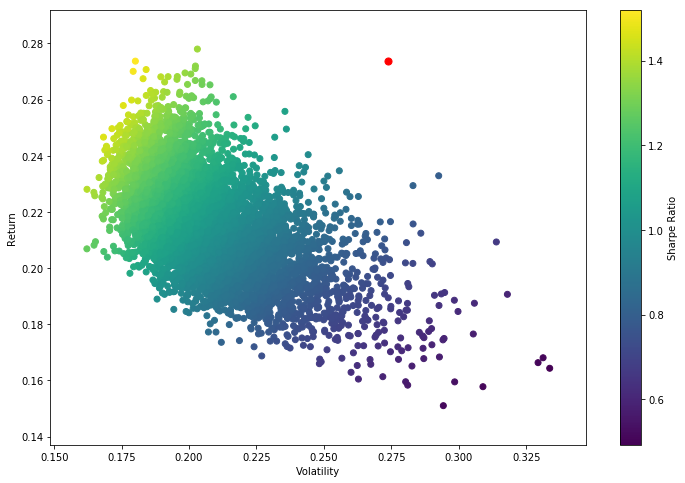

In [141]:

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [142]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_rtn.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_rtn.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

Moving on, we will need to create a variable to include our constraints like the check_sum. We’ll also define an initial guess and specific bounds, to help the minimization be faster and more efficient. Our initial guess will be 25% for each stock (or 0.25), and the bounds will be a tuple (0,1) for each stock, since the weight can range from 0 to 1

In [143]:
cons = ({'type':'eq', 'fun':check_sum})
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1) )
# init_guess = [0.1429,0.1429,0.1429,0.1429,0.1429,0.1429,0.1426]
init_guess = [0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909]

In [144]:
# minimize 
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results)
#  ['AAPL','AMZN','GLOB','HES','KL','NFLX','NJR']

     fun: -1.6851302817319382
     jac: array([ 2.37748027e-04, -3.83079052e-04,  1.42698437e-02, -1.14530325e-04,
       -8.01980495e-05,  9.74662602e-03, -2.47739255e-03,  6.52680665e-01,
        6.53088093e-04, -1.33246183e-04,  4.80501950e-02])
 message: 'Optimization terminated successfully.'
    nfev: 123
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([4.88392376e-01, 7.64875036e-02, 1.58573922e-17, 6.56467444e-02,
       8.02674584e-02, 3.22917675e-17, 7.34851312e-02, 1.17329904e-16,
       1.75473413e-01, 4.02473728e-02, 2.05908551e-17])


In [145]:
get_ret_vol_sr(opt_results.x)
# return, volatility, and sharpe ratio

array([0.28865025, 0.17129254, 1.68513028])

In [146]:
frontier_y = np.linspace(0,.43,500)

In [147]:
def minimize_volatility(weights):
    return(get_ret_vol_sr(weights))[1]

In [148]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

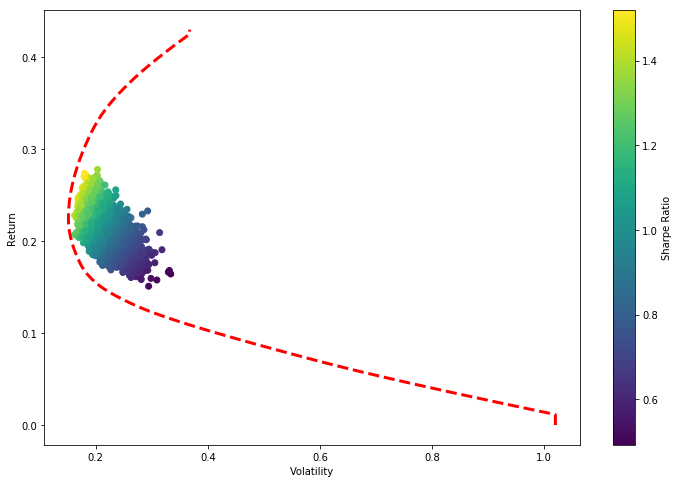

In [149]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()



In [150]:
get_ret_vol_sr(opt_results.x)
# return, volatility, and sharpe ratio

array([0.28865025, 0.17129254, 1.68513028])

In [151]:
#  ['AAPL','AMZN','GLOB','HES','KL','NFLX','NJR']
# Optimal weights
print(all_weights[Arr,:])

[0.17796527 0.00705206 0.02303242 0.18628893 0.10458661 0.01591001
 0.08537328 0.03738564 0.26294197 0.05823071 0.04123308]


https://towardsdatascience.com/python-markowitz-optimization-b5e1623060f5